In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

In [2]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers.readers:

read_csv(filepath_or_buffer: 'FilePathOrBuffer', sep=<no_default>, delimiter=None, header='infer', names=<no_default>, index_col=None, usecols=None, squeeze=False, prefix=<no_default>, mangle_dupe_cols=True, dtype: 'DtypeArg | None' = None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: 'str' = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors: 'str | None' = 'strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_me

In [3]:
df = pd.read_csv("./bikesharing.csv")

In [4]:
df.shape

(731, 12)

In [5]:
np.int64

numpy.int64

In [6]:
np.float64

numpy.float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   year        731 non-null    int64  
 2   month       731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  count       731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [8]:
df.head(1)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985


In [9]:
# 컬럼들의 기술통계 
df.describe()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


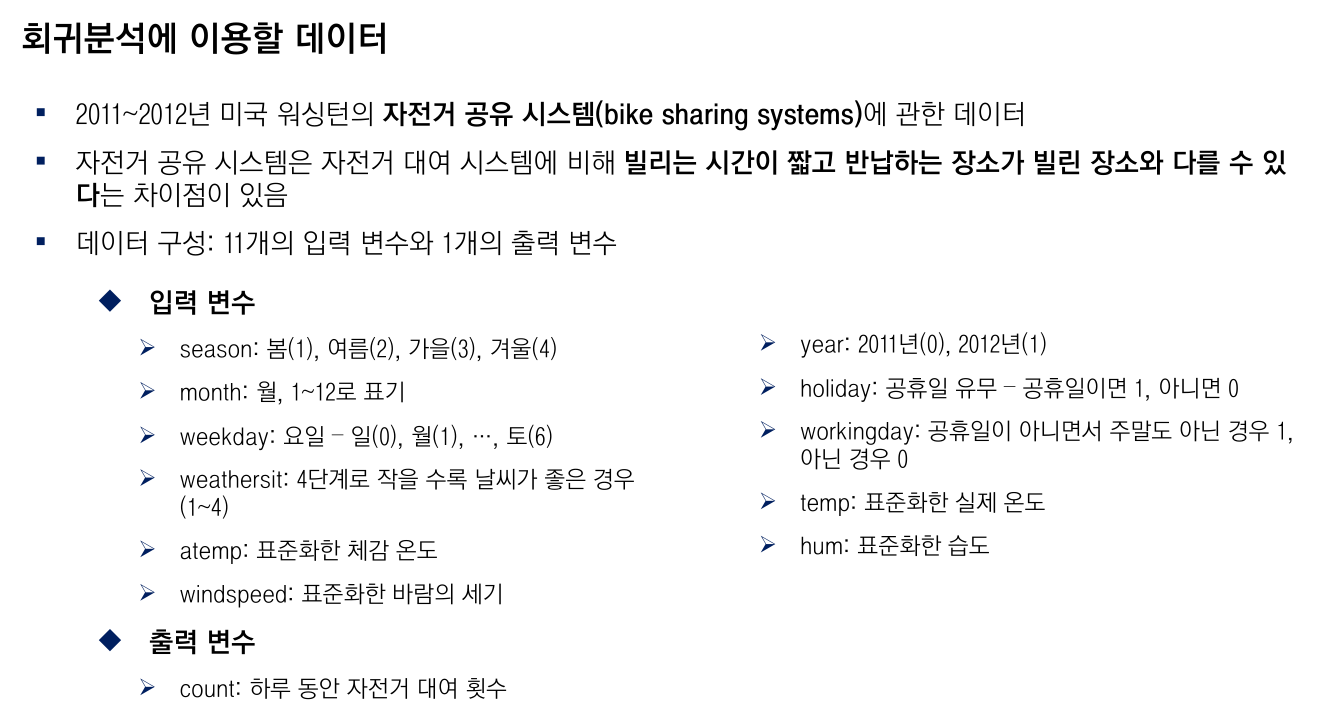

In [10]:
df.iloc[:,:-1].corr()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046
year,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817
month,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489


In [11]:
df.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
count         0
dtype: int64

In [12]:
df.head(1)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985


In [13]:
data_x = df.iloc[:,:-1].to_numpy()

In [14]:
data_x.shape

(731, 11)

In [15]:
data_y = df.iloc[:, -1].to_numpy()

In [16]:
train_input, test_input, train_target, test_target = train_test_split(data_x, data_y, random_state=42)

In [17]:
train_input[0]

array([ 4.      ,  1.      , 11.      ,  0.      ,  1.      ,  1.      ,
        2.      ,  0.380833,  0.375621,  0.623333,  0.235067])

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(train_input, train_target)

LinearRegression()

In [20]:
print(lr.score(train_input, train_target))

0.7887834199213852


In [21]:
print(lr.score(test_input, test_target))

0.8158954153942368


In [22]:
from sklearn.metrics import mean_squared_error 

In [23]:
# squared = False -> RMSE
# squared = True -> MSE
mean_squared_error(test_target, lr.predict(test_input), squared=True)

709526.9248969237

In [24]:
np.sqrt(709526.9248969237)

842.3342121135314

# 다항회귀

In [25]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [26]:
train_poly.shape

(548, 77)

In [27]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.902609034090613


In [28]:
print(lr.score(test_poly, test_target))

0.8421643731556568


In [29]:
mean_squared_error(test_target, lr.predict(test_poly), squared=False)

779.9282623905297

# ridge(L2)
* 0에 가깝게 만듬

In [30]:
ridge = Ridge()
ridge.fit(train_poly, train_target)
print(ridge.score(train_poly, train_target))

0.8561219938350194


In [31]:
print(ridge.score(test_poly, test_target))

0.8675278384249692


In [32]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_poly, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_poly, train_target))
    test_score.append(ridge.score(test_poly, test_target))


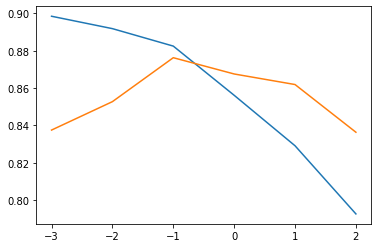

In [33]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [34]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_poly, train_target)

print(ridge.score(train_poly, train_target))
print(ridge.score(test_poly, test_target))

0.8824487078301921
0.8762415029188897


# lasso(L1)
* 계수의 값을 0으로 만듬 

In [47]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=1000000)
    # 릿지 모델을 훈련합니다
    lasso.fit(train_poly, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_poly, train_target))
    test_score.append(lasso.score(test_poly, test_target))

In [48]:
import numpy as np

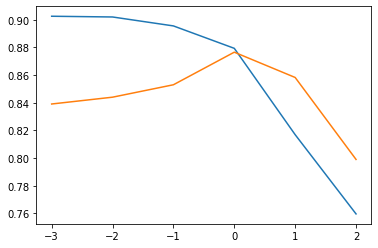

In [49]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [56]:
lasso = Lasso(alpha=1, max_iter=1000000)
lasso.fit(train_poly, train_target)

print(lasso.score(train_poly, train_target))
print(lasso.score(test_poly, test_target))

0.8793887887752897
0.8766112901816778


In [57]:
from sklearn.metrics import mean_squared_error 

In [58]:
mean_squared_error(test_target, ridge.predict(test_poly), squared=False)

690.6207962500696

In [59]:
mean_squared_error(test_target, lasso.predict(test_poly), squared=False)

689.5882456181648

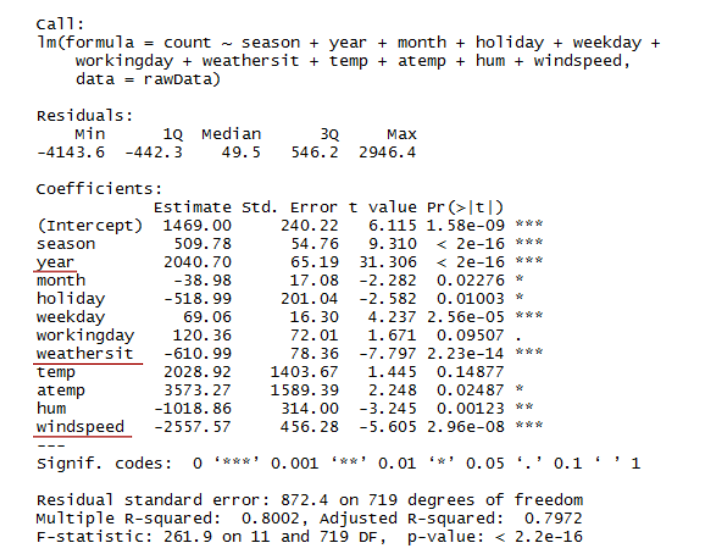